In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aradhanahirapara/farm-produce-data-80-years")

print("Path to dataset files:", path)

d:\Skills\Data-Analysis-With-Python\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Arshad Ziban\.cache\kagglehub\datasets\aradhanahirapara\farm-produce-data-80-years\versions\2


In [2]:
import os

# List all files and subfolders in the dataset directory
print("Files in the dataset directory:")
print(os.listdir(path))

Files in the dataset directory:
['farm_production_dataset.csv']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use the actual file name you found
correct_file_name = "farm_production_dataset.csv" 
file_path = os.path.join(path, correct_file_name)

In [4]:
# Read and show the dataset
df = pd.read_csv(file_path)
df.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


In [5]:
df.isnull().sum()

REF_DATE                                    0
GEO                                         0
Type of crop                                1
Average farm price (dollars per tonne)     30
Average yield (kilograms per hectare)      27
Production (metric tonnes)                 28
Seeded area (acres)                       400
Seeded area (hectares)                    426
Total farm value (dollars)                  0
dtype: int64

In [6]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].min(), inplace=True)

C:\Users\Arshad Ziban\AppData\Local\Temp\ipykernel_9044\1119480267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].min(), inplace=True)


In [7]:
df.isnull().sum()

REF_DATE                                  0
GEO                                       0
Type of crop                              1
Average farm price (dollars per tonne)    0
Average yield (kilograms per hectare)     0
Production (metric tonnes)                0
Seeded area (acres)                       0
Seeded area (hectares)                    0
Total farm value (dollars)                0
dtype: int64

In [8]:
df['REF_DATE'].min()

np.int64(1908)

In [9]:
df['REF_DATE'].max()

np.int64(1984)

In [10]:
#Which provinces are represented?
df['GEO'].unique()

array(['AB', 'BC', 'CA', 'MA', 'MP', 'NB', 'NS', 'ON', 'PP', 'PEI', 'QU',
       'SK', ' ', 'NL'], dtype=object)

In [11]:
#What are the most common crops?
df['Type of crop'].value_counts().head(5)

Type of crop
Barley          924
Oats            924
Wheat, all      924
Tame hay        924
Mixed grains    914
Name: count, dtype: int64

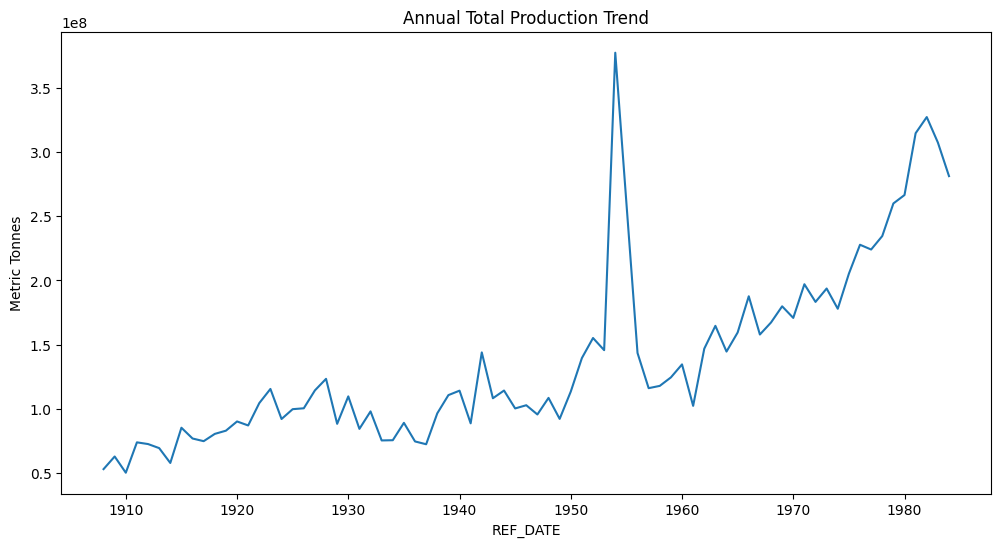

In [12]:
#How does production vary by year?
plt.figure(figsize=(12,6))
df.groupby('REF_DATE')['Production (metric tonnes)'].sum().plot()
plt.title("Annual Total Production Trend")
plt.ylabel("Metric Tonnes")
plt.show()

In [13]:
#Which province has the highest average yield?
prov_yield = df.groupby('GEO')['Average yield (kilograms per hectare)'].mean()

In [14]:
prov_yield

GEO
       1860.000000
AB     3706.071770
BC     4920.343137
CA     4264.111111
MA     3059.990942
MP     2753.227384
NB     3049.139610
NL     3985.000000
NS     3071.468254
ON     4581.390077
PEI    1982.030534
PP     4385.242604
QU     4573.429622
SK     1713.657262
Name: Average yield (kilograms per hectare), dtype: float64

In [15]:
(prov_yield.idxmax(), prov_yield.max())

('BC', np.float64(4920.343137254902))

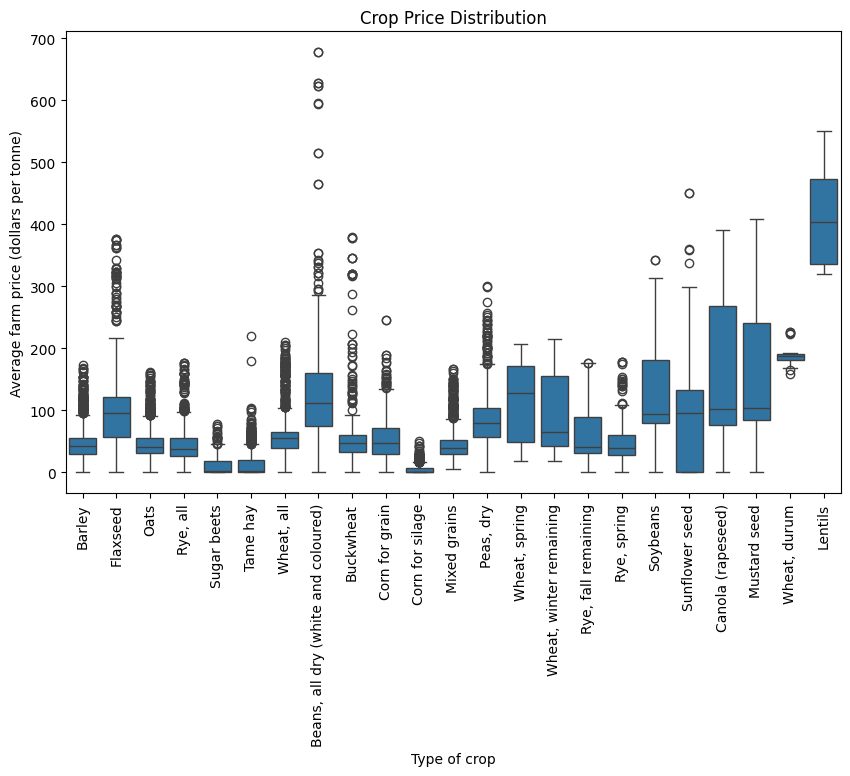

In [16]:
# What's the price distribution of crops?
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Type of crop', y='Average farm price (dollars per tonne)')
plt.xticks(rotation=90)
plt.title("Crop Price Distribution")
plt.show()

In [17]:
#Is there a correlation between yield and price?
corr = df[['Average yield (kilograms per hectare)', 'Average farm price (dollars per tonne)']].corr().iloc[0,1]

In [18]:
corr

np.float64(0.2694696898957967)

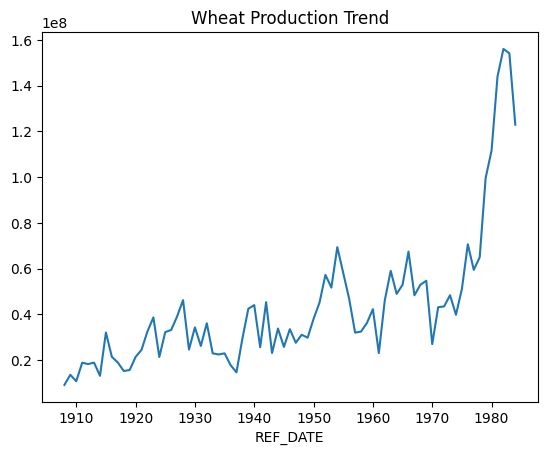

In [19]:
# Handling NaN values by filling them with an empty string
wheat = df[df['Type of crop'].fillna('').str.contains('Wheat')]
wheat.groupby('REF_DATE')['Production (metric tonnes)'].sum().plot(title="Wheat Production Trend")
plt.show()

In [20]:
# What's the average farm size by province?
average_farm_size = df.groupby('GEO')['Seeded area (hectares)'].mean()
average_farm_size

GEO
       3.600000e+03
AB     3.946590e+05
BC     2.584349e+04
CA     1.416794e+06
MA     2.106174e+05
MP     1.119050e+05
NB     3.269255e+04
NL     3.300000e+03
NS     2.296730e+04
ON     2.284779e+05
PEI    2.329399e+04
PP     1.600062e+06
QU     1.742873e+05
SK     8.828895e+05
Name: Seeded area (hectares), dtype: float64

In [21]:
#Which crops have the highest value per hectare?
df['Value per Hectare'] = df['Total farm value (dollars)'] / df['Seeded area (hectares)']
print("\nTop 5 Crops by Value/Hectare:\n", 
      df.groupby('Type of crop')['Value per Hectare'].mean().sort_values(ascending=False).head(5))


Top 5 Crops by Value/Hectare:
 Type of crop
Peas, dry                       inf
Rye, fall remaining             inf
Rye, all                        inf
Wheat, winter remaining         inf
Sugar beets                0.513419
Name: Value per Hectare, dtype: float64


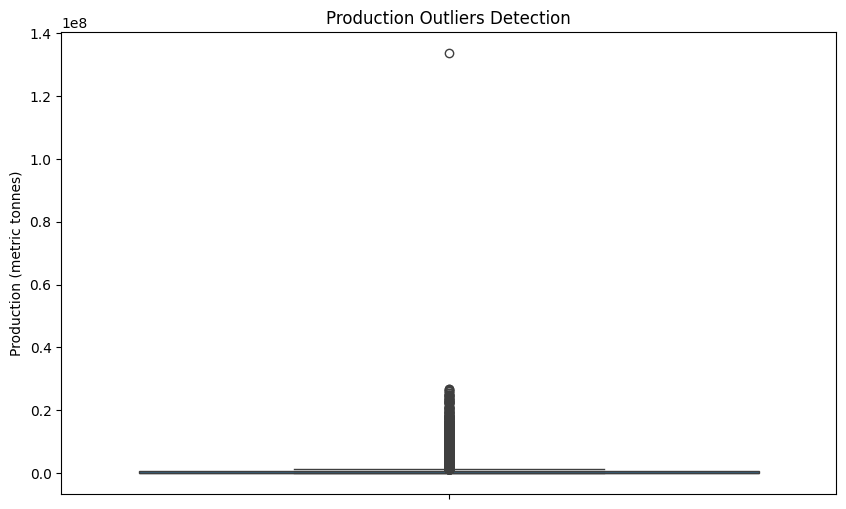

In [22]:
# Are there outliers in production quantities?
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Production (metric tonnes)')
plt.title("Production Outliers Detection")
plt.show()

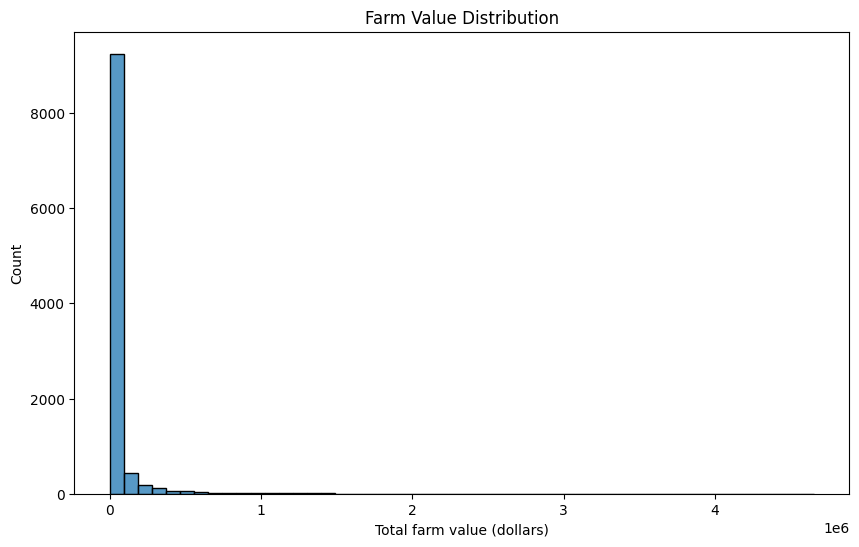

In [23]:
# What's the distribution of farm values?
plt.figure(figsize=(10,6))
sns.histplot(df['Total farm value (dollars)'], bins=50)
plt.title("Farm Value Distribution")
plt.show()

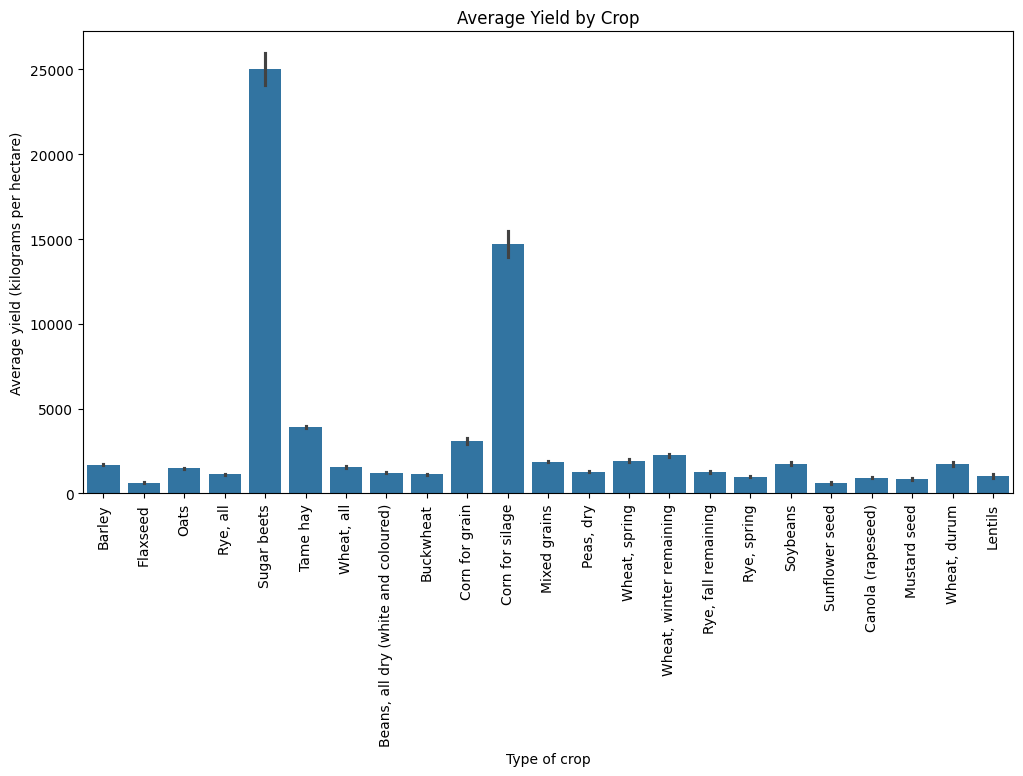

In [24]:
# How does yield vary by crop type?
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Type of crop', y='Average yield (kilograms per hectare)')
plt.xticks(rotation=90)
plt.title("Average Yield by Crop")
plt.show()

In [25]:
#What percentage of production comes from the top 3 crops?
top3 = df['Type of crop'].value_counts().head(3).index
top3_prod = df[df['Type of crop'].isin(top3)]['Production (metric tonnes)'].sum()
print(f"\nTop 3 Crops Contribution: {top3_prod/df['Production (metric tonnes)'].sum()*100:.1f}%")


Top 3 Crops Contribution: 48.2%


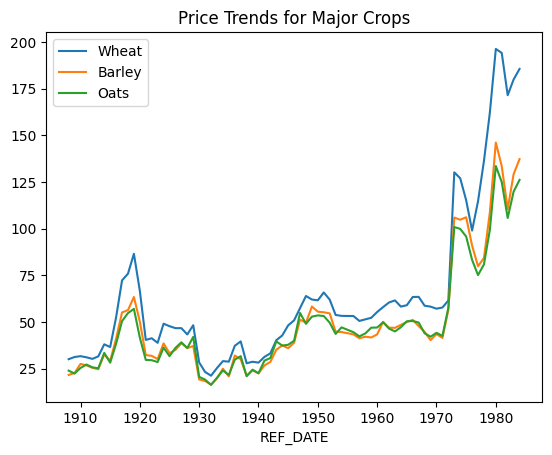

In [29]:
#Is there seasonality in prices for specific crops?
for crop in ['Wheat', 'Barley', 'Oats']:
    crop_df = df[df['Type of crop'].fillna('').str.contains(crop, case=False)]
    crop_df.groupby('REF_DATE')['Average farm price (dollars per tonne)'].mean().plot(label=crop)
plt.legend()
plt.title("Price Trends for Major Crops")
plt.show()

In [30]:
#How correlated are seeded area and production?
area_prod_corr = df[['Seeded area (hectares)', 'Production (metric tonnes)']].corr().iloc[0,1]

In [32]:
area_prod_corr

np.float64(0.861322963907723)

In [36]:
#Which year had the highest total farm value?
max_year = df.groupby('REF_DATE')['Total farm value (dollars)'].sum().idxmax()

In [37]:
max_year

np.int64(1983)

In [38]:
#How many crops have yields above the overall average?
avg_yield = df['Average yield (kilograms per hectare)'].mean()
high_yield_crops = df[df['Average yield (kilograms per hectare)'] > avg_yield]['Type of crop'].nunique()
print(f"\nCrops Above Avg Yield: {high_yield_crops}/{df['Type of crop'].nunique()}")


Crops Above Avg Yield: 6/23


In [39]:
#What's the production-to-area ratio by province?
df['Prod/Area Ratio'] = df['Production (metric tonnes)'] / df['Seeded area (hectares)']
print("\nMost Efficient Provinces:\n", 
      df.groupby('GEO')['Prod/Area Ratio'].mean().sort_values(ascending=False))


Most Efficient Provinces:
 GEO
AB          inf
BC          inf
MA          inf
CA          inf
MP          inf
NB          inf
QU          inf
NS          inf
ON          inf
PEI         inf
SK          inf
PP          inf
NL     3.984375
       1.861111
Name: Prod/Area Ratio, dtype: float64
